In [40]:
import numpy as np
import nltk
import re

text_file = open("lavoztextodump.txt", "r")
dataset = text_file.read()

tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
sentences = tokenizer.tokenize(dataset)

print(sentences[:10])

['-\n"Lo que sostiene a la pareja es el amor"\nClara Crespo (50) y Rodolfo Martínez (54) no se imaginan uno sin el otro.', '"Prefiero ni pensarlo", dice Clara.', 'Hace 26 años que están casados, y tienen cuatro hijas mujeres.', 'Se conocieron en el Ateneo Juventus, el movimiento juvenil de Capuchinos.', 'Hoy aseguran no estar sorprendidos del tiempo que llevan juntos sino de haber logrado entenderse tan bien.', '&#226;&#8364;&#8220;¿Qué les gusta y disgusta del otro?', '¿Qué quisieran cambiarle?', '&#226;&#8364;&#8220;Rodolfo: Me gusta que sea cariñosa, alegre y esté siempre pensando en mí, y que es una gran madre.', 'Me disgustaba que cuando se enojaba no quería hablar, pero ya no lo hace más.', 'A veces es indecisa pero ya me acostumbré.']


In [47]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-ZñÑÁÉÍÓÚáéíóúü]"," ", raw)
    words = clean.split()
    return words

In [48]:
tokens = []
for sentence in sentences:
    tokens.append(sentence_to_wordlist(sentence))
    
print(tokens[:10])

[['Lo', 'que', 'sostiene', 'a', 'la', 'pareja', 'es', 'el', 'amor', 'Clara', 'Crespo', 'y', 'Rodolfo', 'Martínez', 'no', 'se', 'imaginan', 'uno', 'sin', 'el', 'otro'], ['Prefiero', 'ni', 'pensarlo', 'dice', 'Clara'], ['Hace', 'años', 'que', 'están', 'casados', 'y', 'tienen', 'cuatro', 'hijas', 'mujeres'], ['Se', 'conocieron', 'en', 'el', 'Ateneo', 'Juventus', 'el', 'movimiento', 'juvenil', 'de', 'Capuchinos'], ['Hoy', 'aseguran', 'no', 'estar', 'sorprendidos', 'del', 'tiempo', 'que', 'llevan', 'juntos', 'sino', 'de', 'haber', 'logrado', 'entenderse', 'tan', 'bien'], ['Qué', 'les', 'gusta', 'y', 'disgusta', 'del', 'otro'], ['Qué', 'quisieran', 'cambiarle'], ['Rodolfo', 'Me', 'gusta', 'que', 'sea', 'cariñosa', 'alegre', 'y', 'esté', 'siempre', 'pensando', 'en', 'mí', 'y', 'que', 'es', 'una', 'gran', 'madre'], ['Me', 'disgustaba', 'que', 'cuando', 'se', 'enojaba', 'no', 'quería', 'hablar', 'pero', 'ya', 'no', 'lo', 'hace', 'más'], ['A', 'veces', 'es', 'indecisa', 'pero', 'ya', 'me', 'acos

In [52]:
import multiprocessing

features = 300
min_word_count = 3
workers = multiprocessing.cpu_count()
downsampling = 1e-3
window_size = 7
seed = 1

In [69]:
import gensim.models.word2vec as w2v

model = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=workers,
    size=features,
    min_count=min_word_count,
    window=window_size,
    sample=downsampling
)

model.build_vocab(tokens)
model.train(tokens, total_examples=model.corpus_count, epochs=5)
print('amor', model.wv['amor'])

amor [-0.56843877  0.11416093 -0.07915534  0.1648767  -0.17470472 -0.40564317
  0.04915608 -0.24434136 -0.04424622  0.11877266 -0.18358143 -0.1040011
  0.13861515  0.33145872 -0.54926574 -0.07416125  0.40012521  0.26269859
 -0.08440167  0.1670253   0.22475244 -0.35858506  0.01340588 -0.22528876
 -0.01393416 -0.08219814  0.26052338 -0.46636117 -0.51312333  0.17955023
  0.09994376  0.0185319  -0.01949605  0.26369128  0.02921049  0.0738498
  0.35089839 -0.22133863  0.12011655 -0.27753299  0.23518056 -0.20801044
 -0.4223499  -0.0131952   0.16209723 -0.20328708  0.069484   -0.26911739
 -0.05740462 -0.19578694 -0.05679884 -0.42490271  0.1599903  -0.05799206
 -0.14556344  0.1577916  -0.13406776 -0.21641544 -0.0713604  -0.27415365
  0.11828744  0.18825647 -0.20427367 -0.09731033  0.31632501 -0.40644518
 -0.00679961  0.13280518  0.25727358  0.08171242  0.11428351 -0.16144244
 -0.46158046  0.17081238  0.15864928 -0.12475435  0.17132281  0.16326088
 -0.40296313  0.57845181  0.26613459 -0.2445343 

In [120]:
print(model.wv.most_similar(positive=['realizar', 'bailó'], negative=['bailar']))
print(model.wv.similarity('mujer', 'hombre'))
print(model.wv.similarity('canción', 'música'))
print(model.wv.similarity('amor', 'inversión'))
print(model.wv.doesnt_match("pareja amor querido querida inversión".split()))
print(model.wv.similarity("Sebastián", "ganas"))

[('elaborará', 0.5812728404998779), ('fundacional', 0.5657961368560791), ('brindará', 0.5647754073143005), ('Perinat', 0.5631700754165649), ('realizó', 0.5626703500747681), ('sumaria', 0.5611444711685181), ('enmarcó', 0.560924768447876), ('realizaría', 0.5574065446853638), ('Detenido', 0.5556390881538391), ('fundamenta', 0.5553424954414368)]
0.636739708224
0.506564626777
0.122774441546
inversión
0.157842795115


In [87]:
import os

if not os.path.exists("trained"):
    os.makedirs("trained")

model.save(os.path.join("trained", "model.w2v"))

In [98]:
import sklearn.manifold

model = w2v.Word2Vec.load(os.path.join("trained", "model.w2v"))

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

matrix = model.wv.syn0

matrix2d = tsne.fit_transform(matrix)

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, matrix2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [128]:
print(points.head())

              word          x          y
0       permeables   2.239793  20.367769
1            Tarea -26.321970  -5.412014
2  incontrastables  -0.146950  33.826805
3  microorganismos  10.443445  37.342178
4          Lenguas  -4.385838 -41.284840


<class 'pandas.core.frame.DataFrame'>


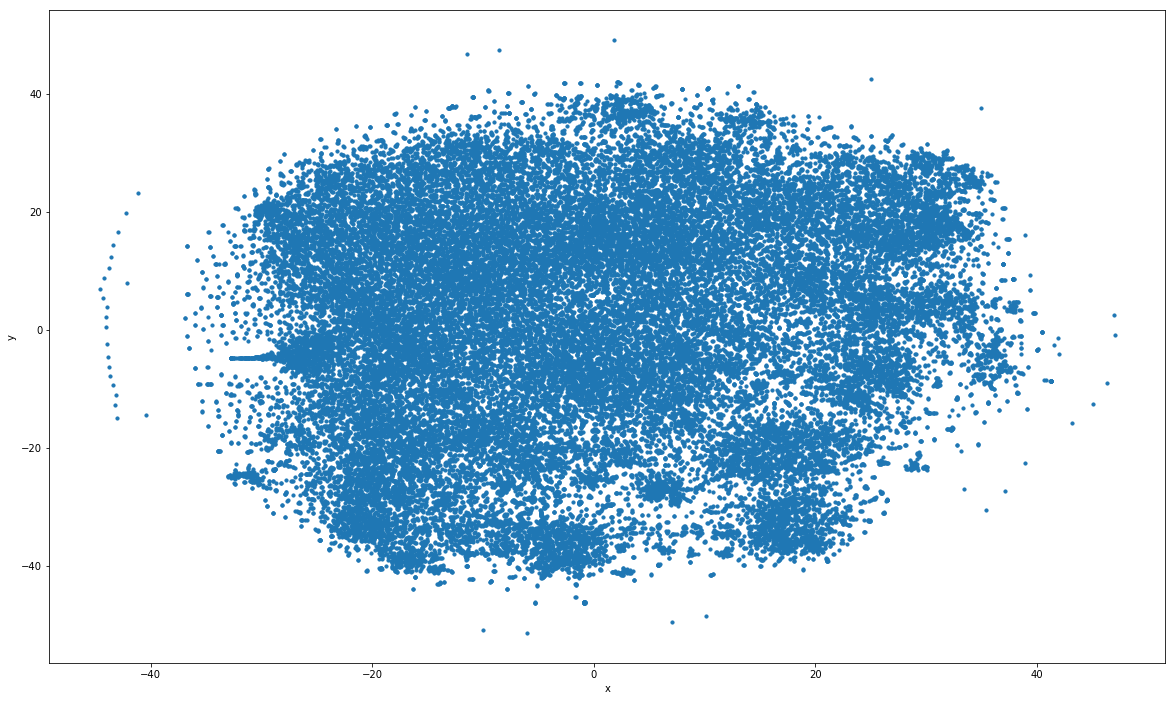

In [129]:
print(type(points))
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [130]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [132]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))

ValueError: scatter requires x column to be numeric